<a href="https://colab.research.google.com/github/PrakashBaire/Alzheimer_Prediction_CNN/blob/main/Alzheimer_CNN_Project_Work_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import cv2
import numpy as np
import tqdm
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam


# Set the directory paths for the train and test folders
train_dir = '/content/drive/MyDrive/Alzheimer_s Dataset/train/'
test_dir = '/content/drive/MyDrive/Alzheimer_s Dataset/test/'
merged_dir = '/content/drive/MyDrive/Alzheimer_s Dataset/merged/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#do not rerun
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    merged_dir_path = os.path.join(merged_dir, folder)
    print(folder_path,":",merged_dir_path)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        shutil.copy(file_path, os.path.join(merged_dir_path, file))


Alzheimer_s Dataset/train/VeryMildDemented : Alzheimer_s Dataset/merged/VeryMildDemented
Alzheimer_s Dataset/train/ModerateDemented : Alzheimer_s Dataset/merged/ModerateDemented
Alzheimer_s Dataset/train/MildDemented : Alzheimer_s Dataset/merged/MildDemented
Alzheimer_s Dataset/train/NonDemented : Alzheimer_s Dataset/merged/NonDemented


In [ ]:
#do not rerun
for folder in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder)
    merged_dir_path = os.path.join(merged_dir, folder)
    print(folder_path,":",merged_dir_path)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        shutil.copy(file_path, os.path.join(merged_dir_path, file))

Alzheimer_s Dataset/test/VeryMildDemented : Alzheimer_s Dataset/merged/VeryMildDemented
Alzheimer_s Dataset/test/ModerateDemented : Alzheimer_s Dataset/merged/ModerateDemented
Alzheimer_s Dataset/test/MildDemented : Alzheimer_s Dataset/merged/MildDemented
Alzheimer_s Dataset/test/NonDemented : Alzheimer_s Dataset/merged/NonDemented


In [ ]:
SIZE = 224

merged_dir = '/content/drive/MyDrive/Alzheimer_s Dataset/merged'

images = []
labels = []

for folder in os.listdir(merged_dir):
    folder_path = os.path.join(merged_dir, folder)
    print("Loading the class: ", folder)
    for file in tqdm.tqdm(os.listdir(folder_path)):
            try:
              file_path = os.path.join(folder_path, file)
              img = cv2.imread(file_path)
              img = cv2.resize(img, (SIZE, SIZE))
              img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
              images.append(img)
              labels.append(folder)
            except:
              print("Skipped")
images = np.array(images)
labels = np.array(labels)
len(images), len(labels)

Loading the class:  MildDemented


100%|██████████| 896/896 [00:03<00:00, 239.91it/s]


Loading the class:  ModerateDemented


100%|██████████| 64/64 [00:00<00:00, 252.71it/s]


Loading the class:  VeryMildDemented


100%|██████████| 2240/2240 [00:10<00:00, 207.23it/s]


Loading the class:  NonDemented


100%|██████████| 3200/3200 [00:13<00:00, 229.27it/s]


(6400, 6400)

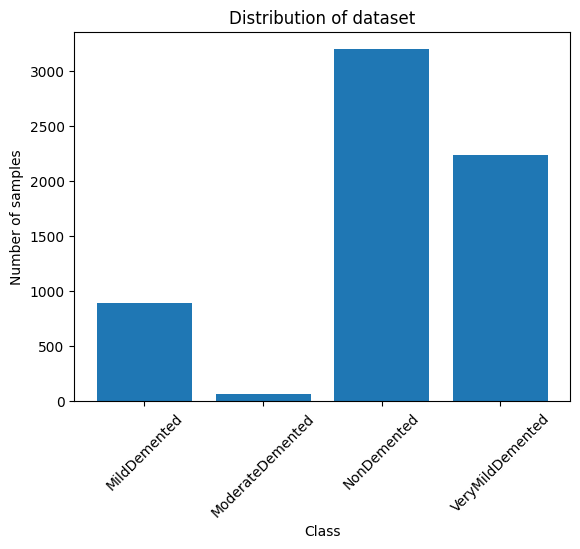

In [ ]:
import matplotlib.pyplot as plt

class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

# Count the number of samples in each class
class_counts = [np.sum(labels == class_name) for class_name in class_names]

# Plot the distribution as a bar chart
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.xticks(rotation=45)
plt.title('Distribution of dataset')



In [ ]:
labels_final = []
label_map = {'MildDemented': 'Present',
             'ModerateDemented': 'Present',
             'VeryMildDemented': 'Present',
             "NonDemented": "Absent"}
for each in labels:
    labels_final.append(label_map[each])

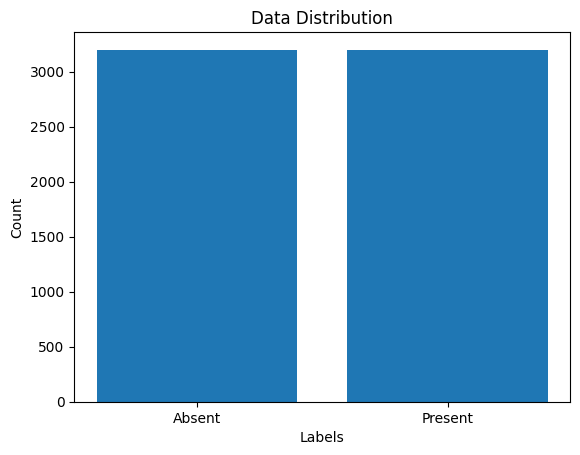

In [ ]:
# Define the labels and their corresponding counts
labels, counts = np.unique(labels_final, return_counts=True)

# Create a bar plot
plt.bar(labels, counts)

# Add title and axis labels
plt.title('Data Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
images.shape

(6400, 156, 156, 3)

In [ ]:
len(labels_final)

6400

Absent [5702 4813 5553 3748 5044]
Present [1106  542  214  606 2586]


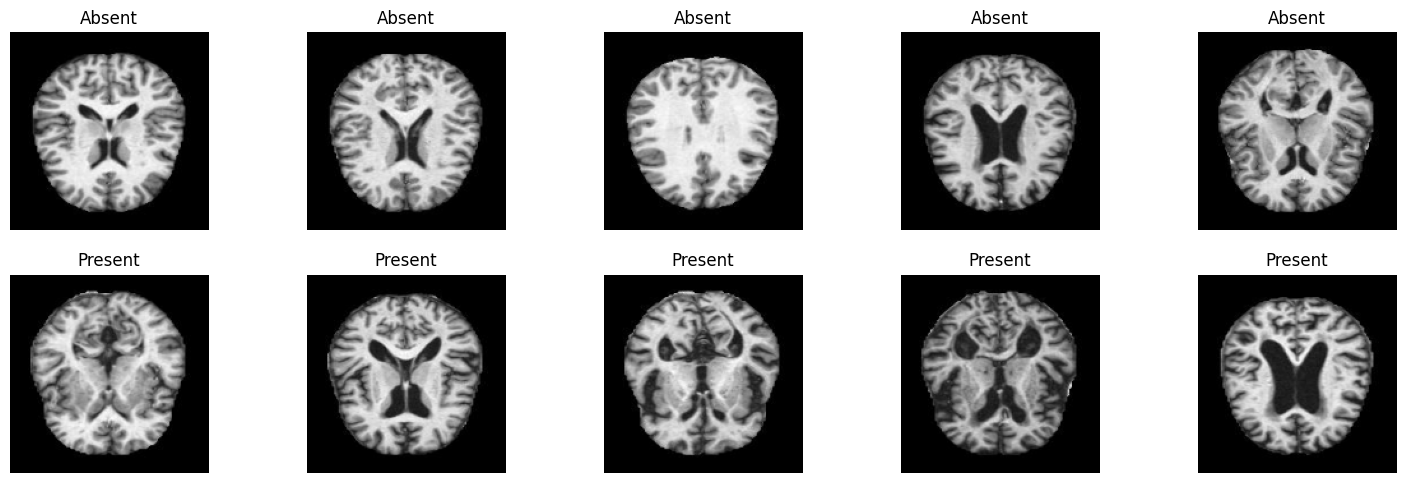

In [ ]:
present=[]
absent=[]
im = {"Present":present, "Absent": absent}

for i, label in enumerate(labels_final):
    if label == "Present":
        im["Present"].append(i)
    else:
        im["Absent"].append(i)


np.random.choice(absent, size=5, replace=False)

fig, ax = plt.subplots(2, 5, figsize=(15, 5))
fig.tight_layout()

for i, label in enumerate(np.unique(labels)):
    label_idxs = np.random.choice(im[label], size=5, replace=False)
    print(label, label_idxs)
    if len(label_idxs) > 0:
        idxs = np.random.choice(label_idxs, size=5, replace=False)
        for j, idx in enumerate(idxs):
            ax[i, j].imshow(images[idx])
            ax[i, j].axis('off')
            ax[i, j].set_title(label)

In [ ]:
images_normalized = images.astype('float32') / 255.0
X_train, X_test, y_train, y_test = train_test_split(images_normalized,
                                                    labels_final,
                                                    test_size=0.2,
                                                    random_state=42)
# Convert labels to numerical values
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Convert numerical labels to one-hot encoding
num_classes = len(np.unique(labels_final))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


In [ ]:
def plot_history(history):
    # Plot the accuracy and loss curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy vs. Epoch')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss vs. Epoch')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')

    plt.show()


In [ ]:
# Load the VGG16 model (pre-trained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(SIZE, SIZE, 3))

# Add custom layers on top of the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

# Train the model
history_vgg16 = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))



Metal device set to: Apple M1 Pro


2023-05-03 16:16:47.817348: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-03 16:16:47.817427: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20


2023-05-03 16:16:48.943791: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-03 16:16:49.314320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


160/160 [==============================] - ETA: 0s - loss: 0.6325 - accuracy: 0.6506

2023-05-03 16:17:31.153733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


160/160 [==============================] - 52s 321ms/step - loss: 0.6325 - accuracy: 0.6506 - val_loss: 0.5640 - val_accuracy: 0.6953
Epoch 2/20
160/160 [==============================] - 50s 315ms/step - loss: 0.5339 - accuracy: 0.7381 - val_loss: 0.5620 - val_accuracy: 0.6703
Epoch 3/20
160/160 [==============================] - 50s 315ms/step - loss: 0.5009 - accuracy: 0.7576 - val_loss: 0.4591 - val_accuracy: 0.7930
Epoch 4/20
160/160 [==============================] - 51s 318ms/step - loss: 0.4562 - accuracy: 0.7941 - val_loss: 0.4344 - val_accuracy: 0.8031
Epoch 5/20
160/160 [==============================] - 50s 314ms/step - loss: 0.4273 - accuracy: 0.8031 - val_loss: 0.4041 - val_accuracy: 0.8336
Epoch 6/20
160/160 [==============================] - 51s 317ms/step - loss: 0.3990 - accuracy: 0.8215 - val_loss: 0.4044 - val_accuracy: 0.8266
Epoch 7/20
160/160 [==============================] - 50s 316ms/step - loss: 0.3699 - accuracy: 0.8449 - val_loss: 0.3688 - val_accuracy: 0.8

In [ ]:
# Import necessary libraries
from keras.applications import ResNet50
from keras.applications.densenet import DenseNet121
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam

# Load the ResNet50 model (pre-trained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False,
                      input_shape=(SIZE, SIZE, 3))

# Add custom layers on top of the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

# Create the final model
model2 = Model(inputs=base_model.input, outputs=x)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model2.compile(loss='categorical_crossentropy',
               optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Train the model
history_resnet50 = model2.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/30


2023-05-03 17:01:45.160030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


160/160 [==============================] - ETA: 0s - loss: 0.8366 - accuracy: 0.5607

2023-05-03 17:02:12.192594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


160/160 [==============================] - 52s 317ms/step - loss: 0.8366 - accuracy: 0.5607 - val_loss: 0.6882 - val_accuracy: 0.5051
Epoch 2/30
160/160 [==============================] - 48s 302ms/step - loss: 0.6688 - accuracy: 0.5977 - val_loss: 0.6655 - val_accuracy: 0.5998
Epoch 3/30
160/160 [==============================] - 48s 302ms/step - loss: 0.6695 - accuracy: 0.5904 - val_loss: 0.6598 - val_accuracy: 0.6615
Epoch 4/30
160/160 [==============================] - 48s 302ms/step - loss: 0.6558 - accuracy: 0.6113 - val_loss: 0.6468 - val_accuracy: 0.6416
Epoch 5/30
160/160 [==============================] - 48s 303ms/step - loss: 0.6480 - accuracy: 0.6238 - val_loss: 0.6328 - val_accuracy: 0.6773
Epoch 6/30
160/160 [==============================] - 48s 302ms/step - loss: 0.6319 - accuracy: 0.6445 - val_loss: 0.6308 - val_accuracy: 0.6898
Epoch 7/30
160/160 [==============================] - 48s 303ms/step - loss: 0.6261 - accuracy: 0.6594 - val_loss: 0.6673 - val_accuracy: 0.5

In [ ]:
# Load the DenseNet121 model (pre-trained on ImageNet)
base_model = DenseNet121(weights='imagenet', include_top=False,
                         input_shape=(SIZE, SIZE, 3))

# Add custom layers on top of the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

# Create the final model
model3 = Model(inputs=base_model.input, outputs=x)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model3.compile(loss='categorical_crossentropy',
               optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Train the model
history_densenet121 = model3.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/30


2023-05-03 17:26:02.791494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


160/160 [==============================] - ETA: 0s - loss: 0.9111 - accuracy: 0.6115

2023-05-03 17:26:27.323010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


160/160 [==============================] - 48s 281ms/step - loss: 0.9111 - accuracy: 0.6115 - val_loss: 0.5810 - val_accuracy: 0.6621
Epoch 2/30
160/160 [==============================] - 42s 261ms/step - loss: 0.5599 - accuracy: 0.7080 - val_loss: 0.5355 - val_accuracy: 0.7406
Epoch 3/30
160/160 [==============================] - 42s 261ms/step - loss: 0.5200 - accuracy: 0.7418 - val_loss: 0.4697 - val_accuracy: 0.7820
Epoch 4/30
160/160 [==============================] - 42s 261ms/step - loss: 0.4795 - accuracy: 0.7656 - val_loss: 0.4502 - val_accuracy: 0.7924
Epoch 5/30
160/160 [==============================] - 42s 261ms/step - loss: 0.4465 - accuracy: 0.7918 - val_loss: 0.4612 - val_accuracy: 0.7672
Epoch 6/30
160/160 [==============================] - 42s 261ms/step - loss: 0.4254 - accuracy: 0.8053 - val_loss: 0.3778 - val_accuracy: 0.8357
Epoch 7/30
160/160 [==============================] - 42s 261ms/step - loss: 0.3904 - accuracy: 0.8338 - val_loss: 0.3520 - val_accuracy: 0.8

Accuray and loss plot of VGG16


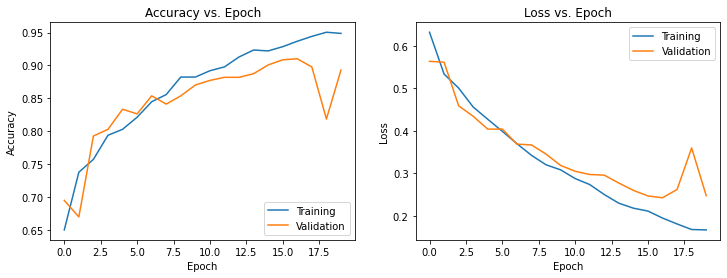

Accuray and loss plot of RESNET50


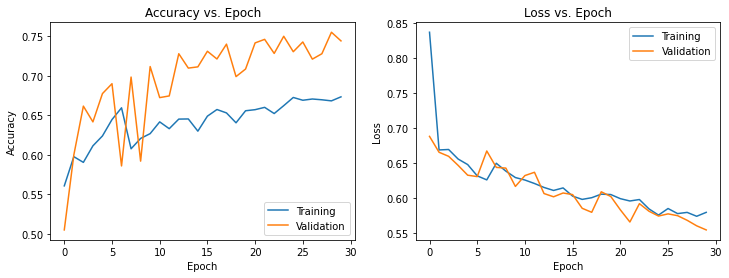

Accuray and loss plot of DENSENET121


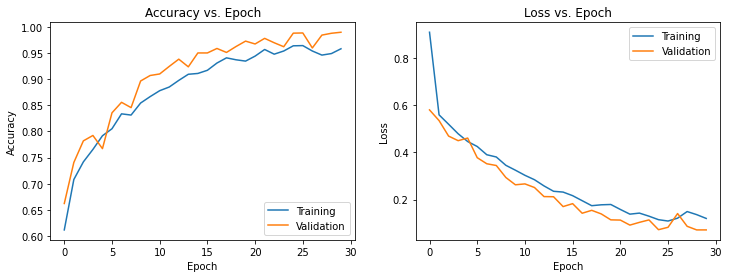

Accuray and loss plot of Novel Model


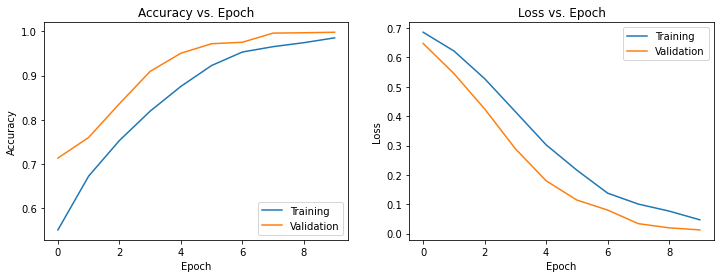

In [ ]:
print("Accuray and loss plot of VGG16")
plot_history(history_vgg16)
print("Accuray and loss plot of RESNET50")
plot_history(history_resnet50)
print("Accuray and loss plot of DENSENET121")
plot_history(history_densenet121)


# Evaluation of the model

In [ ]:
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test):
    # Get the model's predictions on the test data
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate the accuracy
    accuracy = metrics.accuracy_score(y_true, y_pred_classes)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    # Print the classification report
    print("Classification Report:")
    print(metrics.classification_report(y_true, y_pred_classes))

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_true, y_pred_classes))

    # Plot the confusion matrix heatmap
    confusion_mtx = metrics.confusion_matrix(y_true, y_pred_classes)
    confusion_mtx_percent = np.round(confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis] * 100, decimals=2)
    plt.figure(figsize=(15, 7))
    sns.heatmap(confusion_mtx_percent, annot=True, fmt='.2f', cmap='Blues')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()


Evaluation Metric for the model VGG16
40/40 [==============================] - 10s 248ms/step
Accuracy: 89.30%
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       613
           1       0.96      0.83      0.89       667

    accuracy                           0.89      1280
   macro avg       0.90      0.90      0.89      1280
weighted avg       0.90      0.89      0.89      1280

Confusion Matrix:
[[587  26]
 [111 556]]


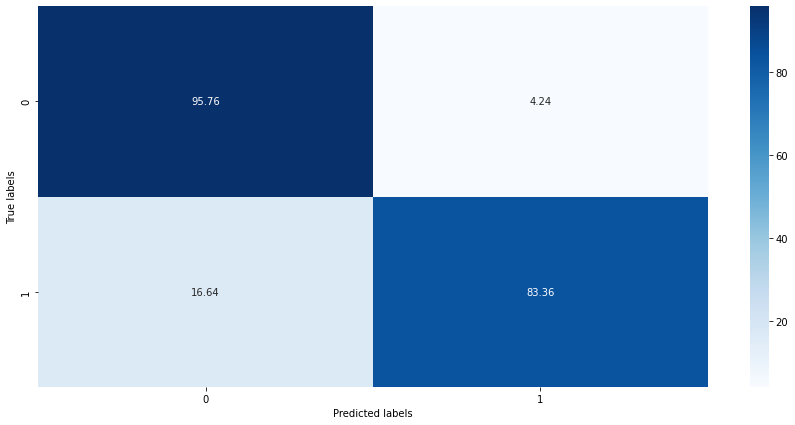

Evaluation Metric for the model RESNET50
40/40 [==============================] - 6s 149ms/step
Accuracy: 72.66%
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       613
           1       0.77      0.68      0.72       667

    accuracy                           0.73      1280
   macro avg       0.73      0.73      0.73      1280
weighted avg       0.73      0.73      0.73      1280

Confusion Matrix:
[[478 135]
 [215 452]]


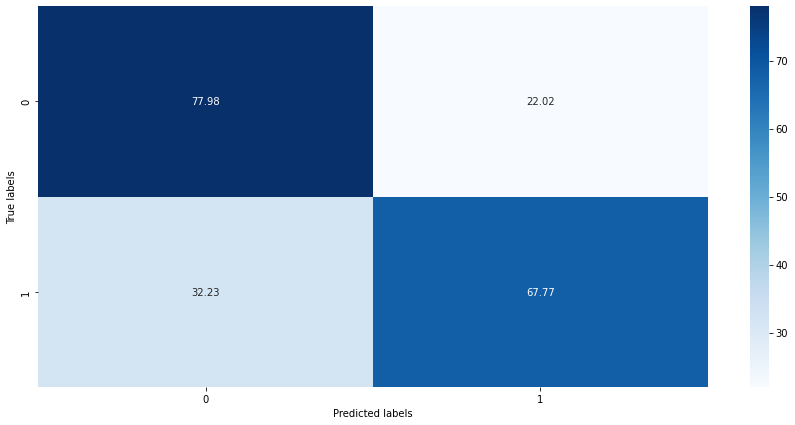

Evaluation Metric for the model DENSENET121
40/40 [==============================] - 5s 130ms/step
Accuracy: 91.72%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       613
           1       0.95      0.89      0.92       667

    accuracy                           0.92      1280
   macro avg       0.92      0.92      0.92      1280
weighted avg       0.92      0.92      0.92      1280

Confusion Matrix:
[[580  33]
 [ 73 594]]


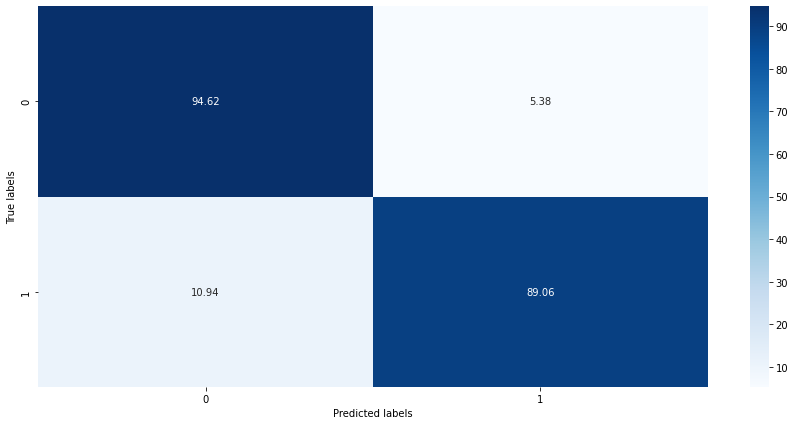

Evaluation Metric for the model Novel Model
40/40 [==============================] - 2s 46ms/step
Accuracy: 97.34%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       613
           1       0.97      0.97      0.97       667

    accuracy                           0.97      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.97      0.97      0.97      1280

Confusion Matrix:
[[596  17]
 [ 17 650]]


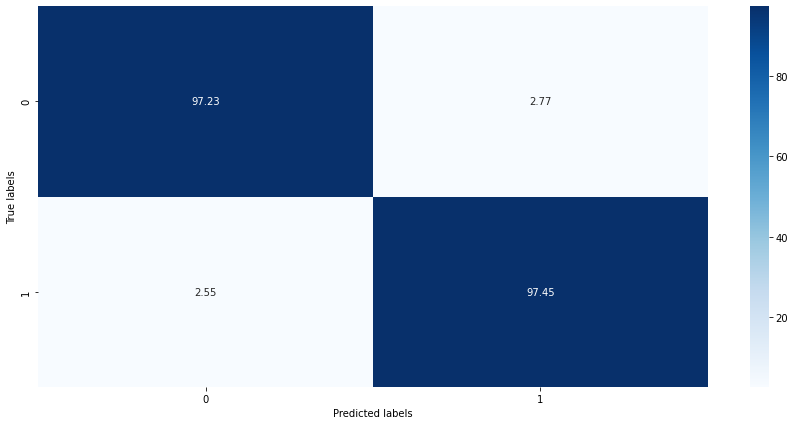

In [ ]:
print("Evaluation Metric for the model VGG16")
evaluate_model(model, X_test, y_test)
print("Evaluation Metric for the model RESNET50")
evaluate_model(model2, X_test, y_test)
print("Evaluation Metric for the model DENSENET121")
evaluate_model(model3, X_test, y_test)

# Ensemble modelling

In [ ]:
from keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score


class EnsembleModel:

    def __init__(self, model_paths):
        self.models = [load_model(path) for path in model_paths]

    def predict(self, X_test):
        predictions = [model.predict(X_test) for model in self.models]
        avg_predictions = np.mean(predictions, axis=0)
        final_predictions = np.argmax(avg_predictions, axis=1)
        return final_predictions

    def evaluate(self, X_test, y_test):
        final_predictions = self.predict(X_test)
        true_labels = np.argmax(y_test, axis=1)
        accuracy = accuracy_score(true_labels, final_predictions)
        return accuracy


# Define the paths to the saved models
model_paths = ['/content/drive/MyDrive/models_saved/vgg16.h5',
               '/content/drive/MyDrive/models_saved/ResNet50.h5',
               '/content/drive/MyDrive/models_saved/Densenet.h5']

# Create an ensemble model
ensemble_model = EnsembleModel(model_paths)

# Evaluate the ensemble model on the testing data
accuracy = ensemble_model.evaluate(X_test, y_test)
print("Ensemble accuracy on the testing data: {:.2f}%".format(accuracy * 100))


40/40 [==============================] - 6s 47ms/step
Ensemble accuracy on the testing data: 93.12%


In [ ]:
print("Ensemble accuracy on the testing data: {:.2f}%".format(accuracy * 100))


Ensemble accuracy on the testing data: 93.12%


40/40 [==============================] - 2s 48ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       613
           1       0.91      0.96      0.94       667

    accuracy                           0.93      1280
   macro avg       0.93      0.93      0.93      1280
weighted avg       0.93      0.93      0.93      1280

Confusion Matrix:
[[550  63]
 [ 25 642]]
Normalized confusion matrix
[[0.89722675 0.10277325]
 [0.03748126 0.96251874]]
40/40 [==============================] - 2s 48ms/step


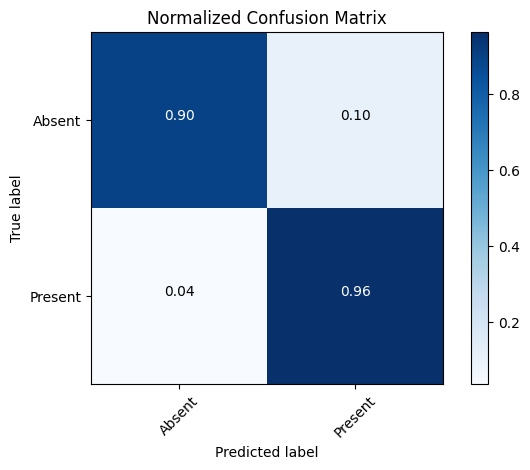

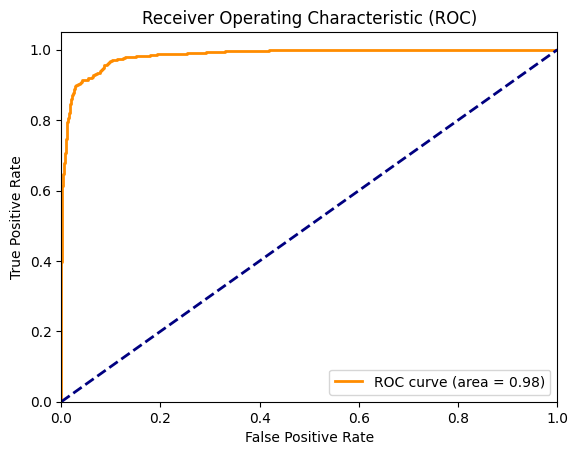

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import itertools

# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Evaluate the ensemble model on the testing data
y_pred = ensemble_model.predict(X_test)
y_true = np.argmax(y_test, axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Print and plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = ['Absent', 'Present']
print("Confusion Matrix:")
print(cm)
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Normalized Confusion Matrix')

# Plot the ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_prob = np.mean([model.predict(X_test) for model in ensemble_model.models], axis=0)
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
